**MNIST Classification Question**

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import numpy as np

from IPython.display import display, clear_output
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from math import ceil

%matplotlib inline

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images.shape
mnist.test.images.shape

(55000, 784)

(10000, 784)

In [0]:
#Functions for plotting images in MNIST

def display_function(imgs, name, size):
    n = imgs.shape[0]
    cols = 10
    rows = ceil(n / cols)
    plt.figure(figsize=(1.7 * cols, 2.2 * rows))
    plt.suptitle(name)
    for i in range(n):
        ax = plt.subplot(rows, cols, i + 1)
        display_mini(ax, imgs[i,:], size)
        
def display_mini(ax, img, size):
    plt.imshow(img.reshape(size), cmap='Greys_r')
    plt.xticks(())
    plt.yticks(())

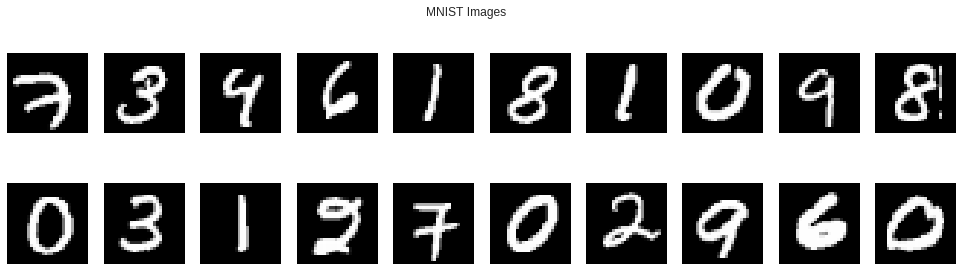

In [6]:
display_function(mnist.train.images[:20,:], "MNIST Images", (28,28))

**Neural Net for MNIST Classification**

In [0]:
#Training and running neural net on complete train and test datasets

#Weight Variable
def weights(shape, name):
    i = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(i, name=name)

#Bias Variable
def bias(shape, name):
    i = tf.random_normal(shape)
    return tf.Variable(i, name=name)

In [8]:
X = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="y")
dropout_var = tf.placeholder("float")

def neural_net(X, dp):
    # Input Layer with 784 units
    weights_1 = weights([784, 784], "weights_1")
    bias_1 = bias([784], "bias_1")

    layer_1 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(X, weights_1) + bias_1), keep_prob = dp)

    #First Hidden Layer with 1024 units
    weights_2 = weights([784, 1024], "weights_2")
    bias_2 = bias([1024], "bias_2")

    layer_2 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_1, weights_2) + bias_2), keep_prob = dp)

    #Second Hidden Layer with 1024 units
    weights_3 = weights([1024, 1024], "weights_3")
    bias_3 = bias([1024], "bias_3")

    layer_3 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_2, weights_3) + bias_3), keep_prob = dp)

    #Third Hidden Layer with 1024 units
    weights_4 = weights([1024, 1024], "weights_4")
    bias_4 = bias([1024], "bias_4")

    layer_4 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_3, weights_4) + bias_4), keep_prob = dp)

    #Fourth Hidden Layer with 1024 units
    weights_5 = weights([1024, 1024], "weights_5")
    bias_5 = bias([1024], "bias_5")

    layer_5 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_4, weights_5) + bias_5), keep_prob = dp)

    #Fifth Hidden Layer with 1024 units
    weights_6 = weights([1024, 1024], "weights_6")
    bias_6 = bias([1024], "bias_6")

    layer_6 = tf.nn.dropout(tf.nn.sigmoid(tf.matmul(layer_5, weights_6) + bias_6), keep_prob = dp)

    #Output layer with 10 units
    output_weights = weights([1024, 10], "output_weights")
    output_bias = bias([10], "output_bias")

    output = tf.matmul(layer_6, output_weights) + output_bias

    return ([output, layer_6, layer_5, layer_4, layer_3, layer_2, layer_1])

#Output 
out = neural_net(X, dropout_var)
output = out[0]

#Optimization
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output, labels = y)) 
train_optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#Checking Accuracy
pred_check = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(pred_check, tf.float32))

#Initializing
init = tf.global_variables_initializer()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
#Running model and testing on the test dataset

max_epochs = 50
batch_size = 100
step = 4

sess = tf.Session()
sess.run(init)

for epoch in range(max_epochs):
    batch = int(mnist.train.num_examples/batch_size)
    
    for i in range(batch):
        b_x, b_y = mnist.train.next_batch(batch_size)
        data = {X: b_x, y: b_y, dropout_var : 0.7}
        sess.run(train_optimizer, feed_dict=data)
        
    if (epoch+1) % step == 0:
        print ("Epoch: %03d/%03d" % (epoch, max_epochs))
        data = {X: b_x, y: b_y, dropout_var : 1.}
        train_out = sess.run(out, feed_dict=data)
        train_output = sess.run(output, feed_dict=data)
        train_acc = sess.run(accuracy, feed_dict=data)
        print ("MNIST Training accuracy: %.3f" % (train_acc))
        data = {X: mnist.test.images, y: mnist.test.labels, dropout_var : 1.}
        test_out = sess.run(out, feed_dict=data)
        test_output = sess.run(output, feed_dict=data)
        test_acc = sess.run(accuracy, feed_dict=data)
        print ("MNIST Test accuracy: %.3f" % (test_acc))
print ("=========================Model Optimization Complete============================")

Epoch: 003/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.965
Epoch: 007/050
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.978
Epoch: 011/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.980
Epoch: 015/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.980
Epoch: 019/050
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.983
Epoch: 023/050
MNIST Training accuracy: 0.990
MNIST Test accuracy: 0.981
Epoch: 027/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.984
Epoch: 031/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.982
Epoch: 035/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.983
Epoch: 039/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.982
Epoch: 043/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.985
Epoch: 047/050
MNIST Training accuracy: 1.000
MNIST Test accuracy: 0.983
=========================Model Optimization Complete============================


**Testing and exploratory analyses on 1000 test samples**

In [10]:
#Sampling from test dataset

import random

mnist_test_list = list(mnist.test.images)
mnist_sample_with_indices = random.sample(list(enumerate(mnist_test_list)), 1000)

test_inds = []
mnist_test_sample = []
for idx, val in mnist_sample_with_indices:
    test_inds.append(idx)
    mnist_test_sample.append(val)

print(test_inds)
print(len(mnist_test_sample))

mnist_test_1000 = np.array(mnist_test_sample)
mnist_test_1000.shape

mnist_test_labellist = list(mnist.test.labels)
mnist_test_lab_sample = [mnist_test_labellist[i] for i in test_inds]
mnist_test_1000_labels = np.array(mnist_test_lab_sample)
mnist_test_1000_labels.shape

[2471, 9456, 8684, 9534, 758, 1199, 4214, 6259, 8459, 661, 7700, 286, 5752, 6988, 4864, 5581, 1927, 6933, 77, 7834, 6610, 6690, 1753, 201, 9359, 5251, 5979, 3577, 7903, 8071, 313, 2102, 3183, 424, 9355, 6278, 6170, 4190, 7547, 6238, 6236, 925, 9092, 1796, 1787, 3337, 5138, 9810, 1293, 7401, 5351, 1012, 1786, 1769, 9185, 1126, 2345, 7012, 7183, 806, 6192, 3468, 7450, 1587, 6700, 1361, 6923, 7862, 2769, 6332, 3849, 9103, 7481, 599, 555, 7509, 4971, 5099, 3376, 9505, 3589, 9933, 2062, 730, 1708, 3571, 9368, 4455, 7144, 2421, 7855, 9648, 9366, 4914, 5861, 5949, 9052, 9333, 7402, 4450, 3633, 5175, 6041, 8549, 7454, 3800, 2632, 1085, 4479, 6293, 6182, 6833, 6725, 3967, 6894, 8595, 1010, 6905, 2620, 5289, 793, 8268, 910, 9275, 4036, 4378, 3111, 3356, 3816, 6415, 7731, 8340, 215, 3783, 6830, 2240, 6888, 3150, 7706, 5809, 2226, 5960, 9087, 5821, 5947, 6585, 3350, 4682, 3088, 4321, 5812, 5643, 5269, 7159, 8199, 5743, 682, 6142, 6193, 575, 5858, 5672, 9181, 792, 4117, 8231, 5156, 2504, 1659, 9234

(1000, 784)

(1000, 10)

In [11]:
data = {X: mnist_test_1000, y: mnist_test_1000_labels, dropout_var : 1.}
test_out_sample = sess.run(out, feed_dict=data)
test_output_sample = sess.run(output, feed_dict=data)
test_acc_sample = sess.run(accuracy, feed_dict=data)
print ("MNIST 1000 sample Test accuracy: %.3f" % (test_acc_sample))

MNIST 1000 sample Test accuracy: 0.986


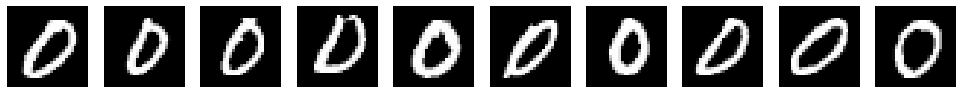

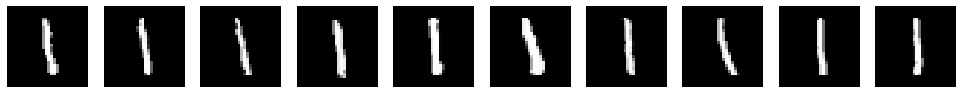

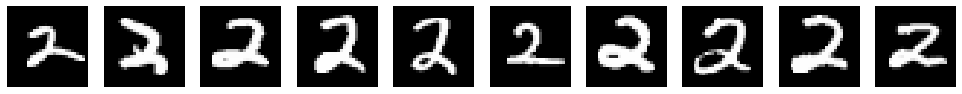

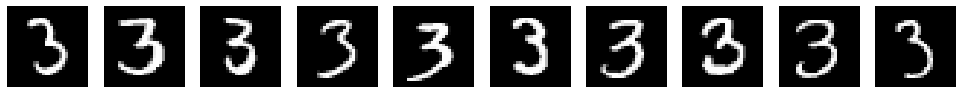

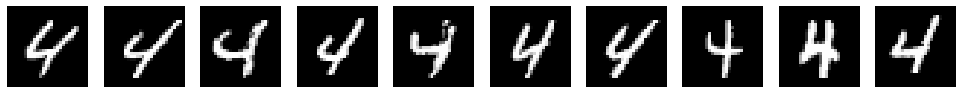

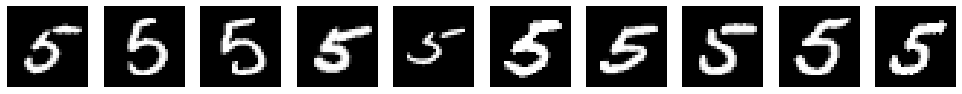

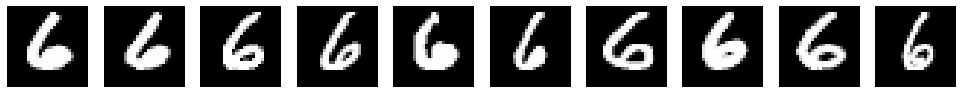

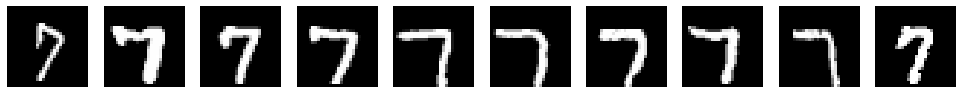

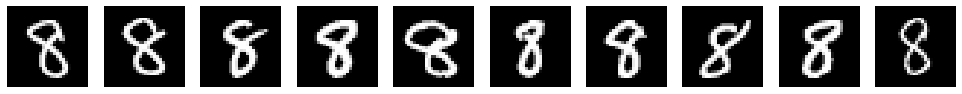

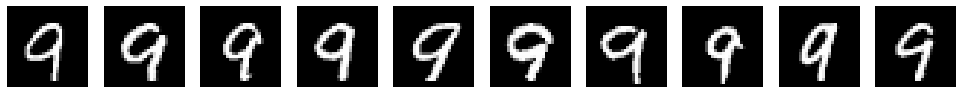

In [12]:
#Showing top 10 images for output layer according to the labels
#Rows - 0 - 10 labels, Columns - 10 images with highest values for the same
#We can see that the network correctly identifies all these images

m = [[0 for i in range(10)] for j in range(10)]
for i in range(10):
    a = test_output_sample[:,i]
    m[i] = sorted(range(len(a)), key=lambda i: a[i], reverse=True)[:10]
    display_function(mnist_test_1000[m[i],:], None , (28,28))


[107, 548, 178, 834, 545, 220, 78, 776, 680, 697]


(1000, 1024)

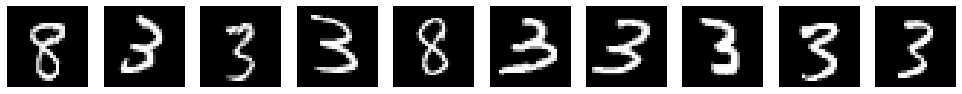

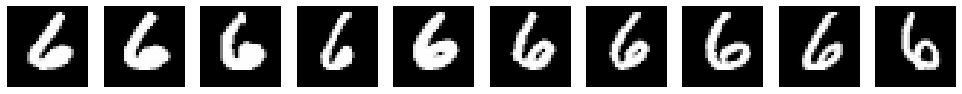

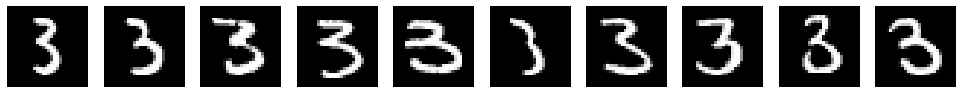

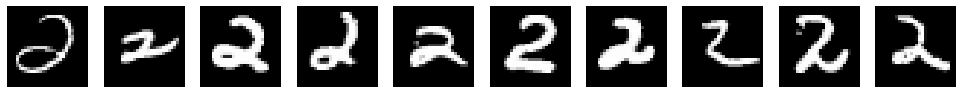

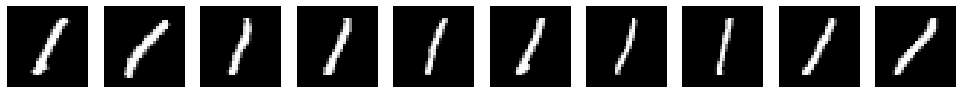

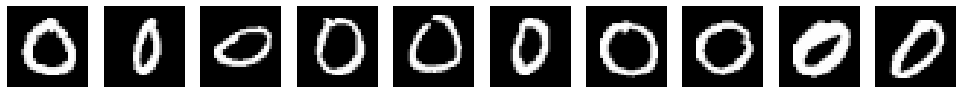

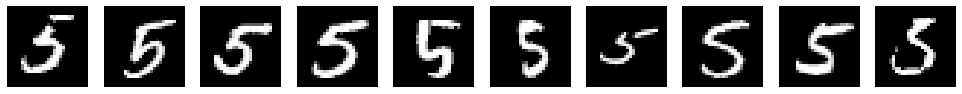

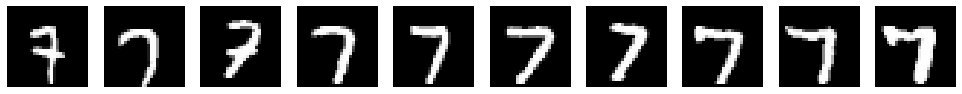

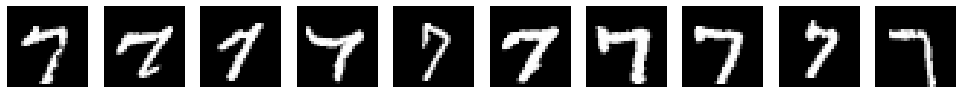

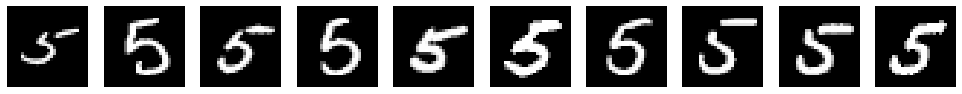

In [13]:
#For 2nd to last layer i.e. last hidden layer, choose 10 random dimensions and print out a subplot of images as above

#select random dimensions out of the 1024
random.seed(123)
rand_dims = random.sample(range(1024),10)
print(rand_dims)

test_out_second_last = test_out_sample[1]
test_out_second_last.shape

#Rows : dimensions (107, 548, 178, 834, 545, 220, 78, 776, 680, 697), Columns : top 10 images for highest values for the dimension
m = [[0 for i in range(10)] for j in range(10)]
l = 0
for i in rand_dims:
    a = test_out_second_last[:,i]
    m[l] = sorted(range(len(a)), key=lambda i: a[i], reverse=True)[:10]
    display_function(mnist_test_1000[m[l],:], None , (28,28))
    l = l + 1
  
#We see that most of these dimensions clearly correspond to a certain digit image

**Dimensionality Reduction Analyses using TSNE**


In [14]:
#Implement dimensionality reduction using t-SNE on input data and plot using scatter plot

from sklearn.manifold import TSNE

mnist_test_1000_reduced = TSNE(n_components=2).fit_transform(mnist_test_1000)
mnist_test_1000_reduced.shape

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Raw Data Samples')

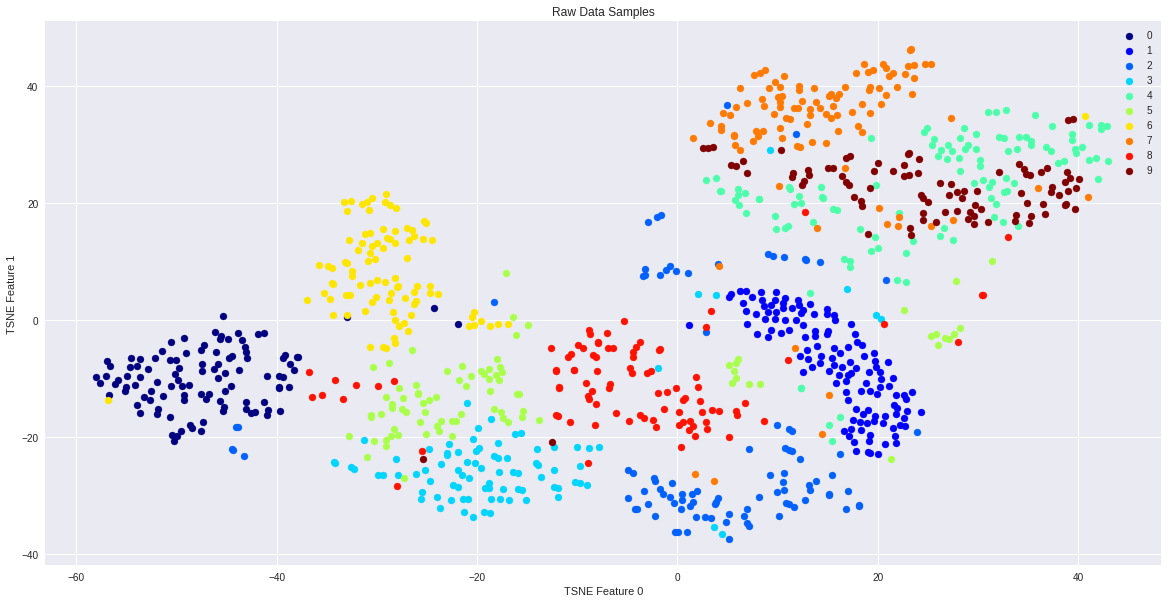

In [15]:
labels = np.argmax(mnist_test_1000_labels, 1)

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_reduced[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_reduced[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Raw Data Samples")
plt.show()

#We see distinctions between the raw image samples according to their digit labels

(1000, 1024)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'First Hidden Layer')

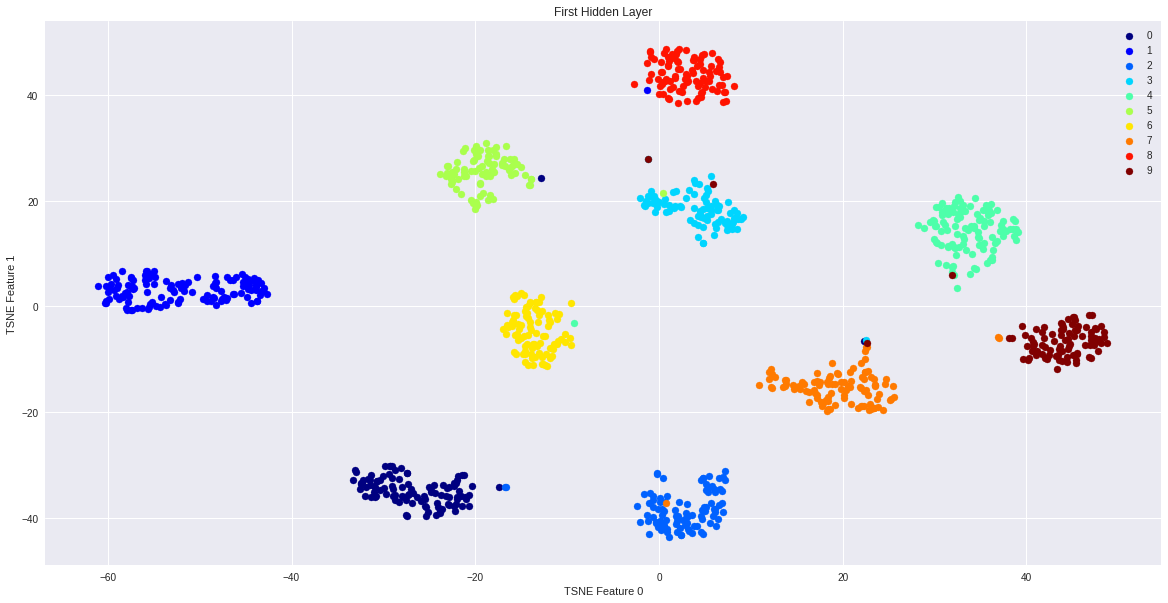

In [16]:
#Output of 1st hidden layer -> TSNE transformation -> scatter plot

test_out_first_hidden_layer = test_out_sample[5]
test_out_first_hidden_layer.shape

mnist_test_1000_lay1red = TSNE(n_components=2).fit_transform(test_out_first_hidden_layer)
mnist_test_1000_lay1red.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_lay1red[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_lay1red[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("First Hidden Layer")

plt.show()

(1000, 1024)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Second Hidden Layer')

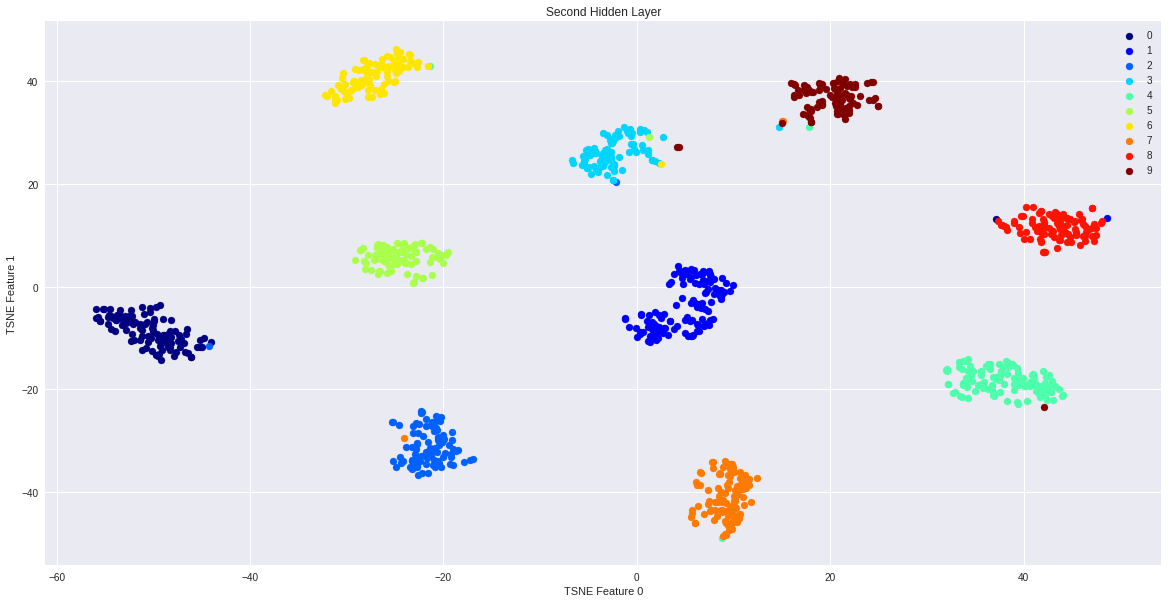

In [17]:
#Output of 2nd hidden layer -> TSNE transformation -> scatter plot

test_out_second_hidden_layer = test_out_sample[4]
test_out_second_hidden_layer.shape

mnist_test_1000_lay2red = TSNE(n_components=2).fit_transform(test_out_second_hidden_layer)
mnist_test_1000_lay2red.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_lay2red[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_lay2red[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Second Hidden Layer")

plt.show()

(1000, 1024)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Third Hidden Layer')

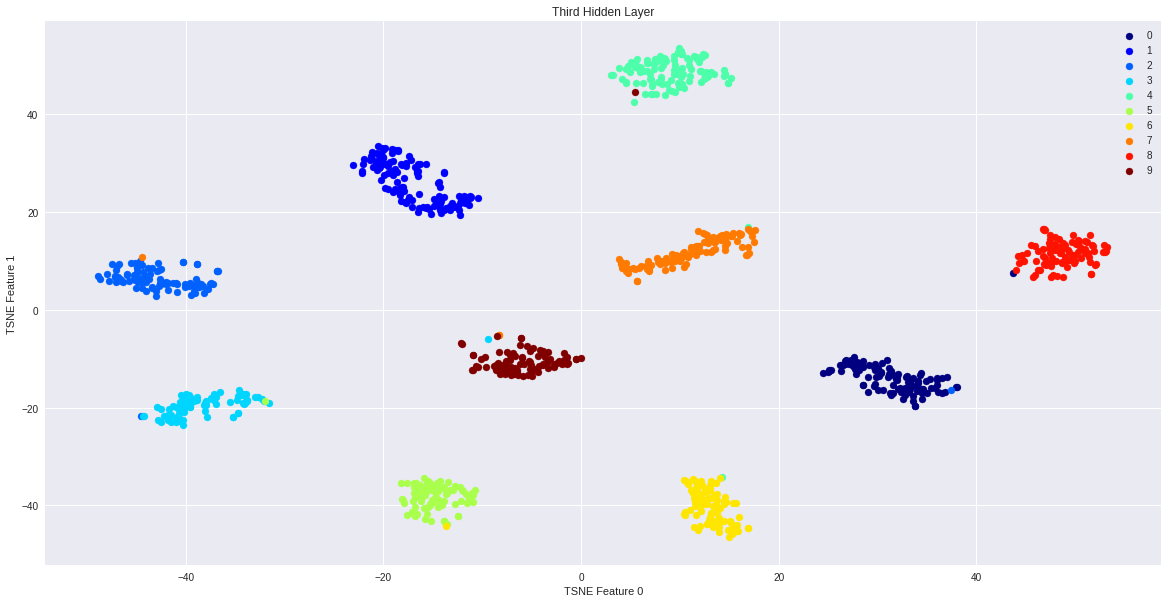

In [18]:
#Output of 3rd hidden layer -> TSNE transformation -> scatter plot

test_out_third_hidden_layer = test_out_sample[3]
test_out_third_hidden_layer.shape

mnist_test_1000_lay3red = TSNE(n_components=2).fit_transform(test_out_third_hidden_layer)
mnist_test_1000_lay3red.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_lay3red[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_lay3red[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Third Hidden Layer")

plt.show()

(1000, 1024)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Fourth Hidden Layer')

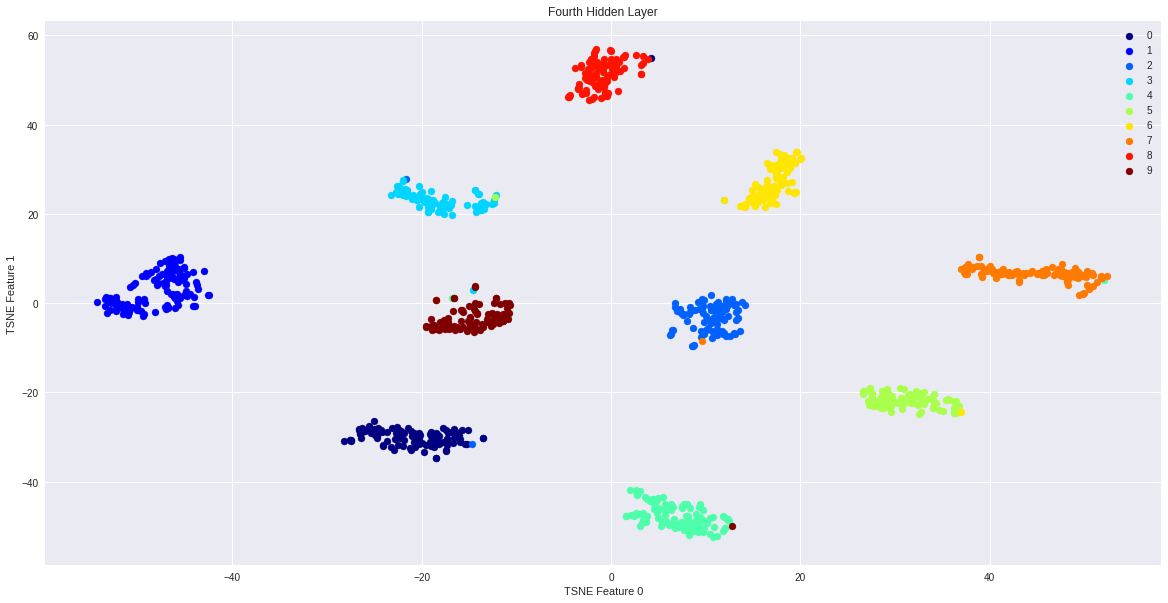

In [19]:
#Output of 4th hidden layer -> TSNE transformation -> scatter plot

test_out_fourth_hidden_layer = test_out_sample[2]
test_out_fourth_hidden_layer.shape

mnist_test_1000_lay4red = TSNE(n_components=2).fit_transform(test_out_fourth_hidden_layer)
mnist_test_1000_lay4red.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_lay4red[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_lay4red[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Fourth Hidden Layer")

plt.show()

(1000, 1024)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Fifth Hidden Layer')

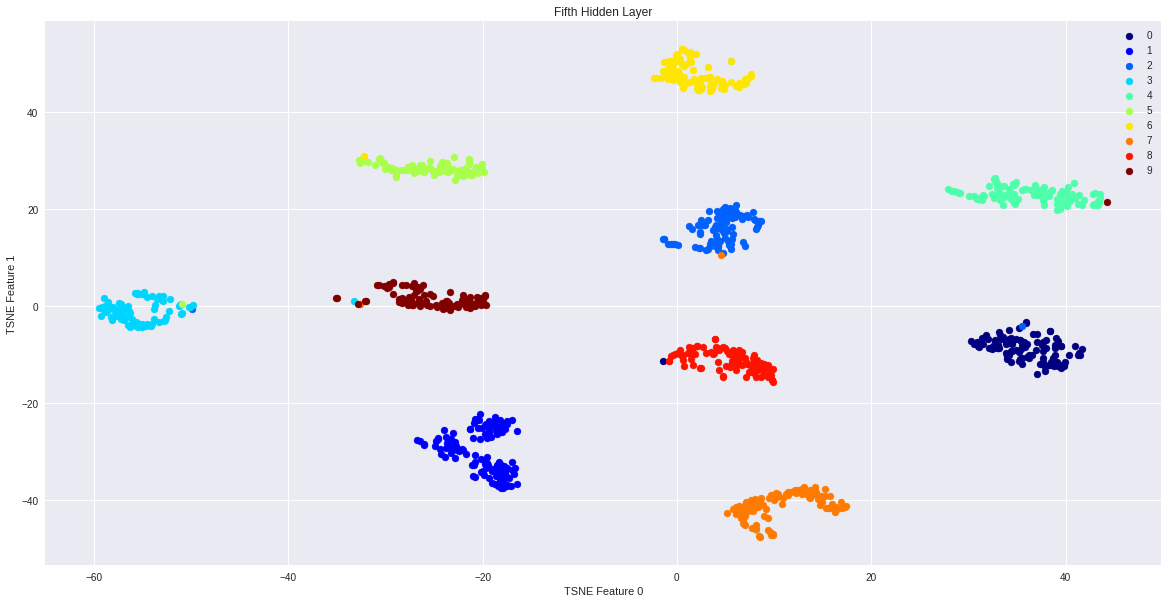

In [20]:
#Output of 5th hidden layer -> TSNE transformation -> scatter plot

test_out_fifth_hidden_layer = test_out_sample[1]
test_out_fifth_hidden_layer.shape

mnist_test_1000_lay5red = TSNE(n_components=2).fit_transform(test_out_fifth_hidden_layer)
mnist_test_1000_lay5red.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_lay5red[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_lay5red[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Fifth Hidden Layer")

plt.show()

(1000, 10)

(1000, 2)

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'TSNE Feature 0')

Text(0, 0.5, 'TSNE Feature 1')

Text(0.5, 1.0, 'Output Layer')

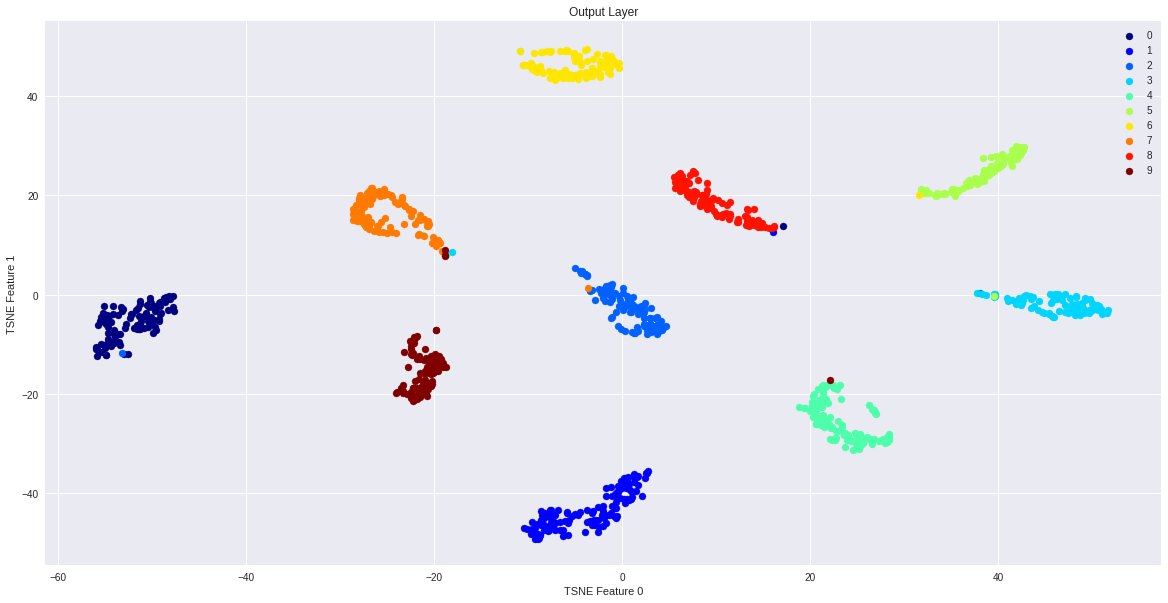

In [21]:
#Output of last layer -> TSNE transformation -> scatter plot

test_out_output_layer = test_out_sample[0]
test_out_output_layer.shape

mnist_test_1000_outred = TSNE(n_components=2).fit_transform(test_out_output_layer)
mnist_test_1000_outred.shape

unique = np.unique(labels)
colors = [plt.cm.jet((i)/float(len(unique)-1)) for i in range(len(unique))]

plt.figure(figsize=(20,10))
for i, u in enumerate(unique):
    xi = [mnist_test_1000_outred[j,0] for j  in range(1000) if labels[j] == u]
    yi = [mnist_test_1000_outred[j,1] for j  in range(1000) if labels[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u), cmap='tab20')
plt.legend()
plt.xlabel("TSNE Feature 0")
plt.ylabel("TSNE Feature 1")
plt.title("Output Layer")

plt.show()